# Gold recovery from ore

Gold is a valuable precious metal that is widely used in various industries. Gold ore is a primary source of gold, and its recovery from ore is a crucial step in gold production. Used method for gold recovery from ore is flotation. Flotation is a process that uses chemicals to selectively separate gold from other minerals.

Necessary to prepare a prototype of a machine learning model for a company that develops solutions for efficient operation of industrial enterprises.

The model should predict the gold recovery coefficient from gold ore using data on mining and processing parameters. This model will help optimize production to avoid launching operations with unprofitable characteristics.

1. Data preparation:

* Obtain data with parameters of gold ore mining and processing.
* Clean the data by removing missing values and outliers.
* Create a target variable - the gold recovery coefficient.

2. Exploratory Data Analysis:

* Conduct statistical analysis to identify correlations between variables.
* Visualize the data to identify patterns and trends.
* Check for multicollinearity among predictor variables.

3. Model building and training:

* Choose a suitable machine learning algorithm.
* Split the data into training and testing sets.
* Train the model on the training data and evaluate its performance on the testing data.
* Tune the hyperparameters of the model to improve its performance.

**Project goal:** To build and select a machine learning model that provides the best sMAPE metric

## Data preparation

Let's import all necessary libraries

In [56]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

from sklearn.model_selection import RandomizedSearchCV

Let's load the datasets with the data. There are three datasets available: full, training, and testing

In [57]:
pth1 = '/datasets/gold_recovery_full_new.csv'
pth2 = 'D:\\Python\\Jupyter\\gold_recovery_full_new.csv'
pth3 = 'D:\Kate\Python\project\gold_recovery\\gold_recovery_full_new.csv'
pth4 = 'C:\\Users\\user\\Documents\\jupyter\\gold_recovery_full_new.csv'

if os.path.exists(pth1):
    data_full = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_full = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data_full = pd.read_csv(pth3)
elif os.path.exists(pth4):
    data_full = pd.read_csv(pth4)
else:
    print('Something is wrong')
data_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [58]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [68]:
pth1 = '/datasets/gold_recovery_train_new.csv'
pth2 = 'D:\\Python\\Jupyter\\gold_recovery_train_new.csv'
pth3 = 'D:\Kate\Python\project\gold_recovery\\gold_recovery_train_new.csv'
pth4 = 'C:\\Users\\user\\Documents\\jupyter\\gold_recovery_train_new.csv'

if os.path.exists(pth1):
    data_train = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_train = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data_train = pd.read_csv(pth3)
elif os.path.exists(pth4):
    data_train = pd.read_csv(pth4)
else:
    print('Something is wrong')
data_train.head(10)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [60]:
pth1 = '/datasets/gold_recovery_test_new.csv'
pth2 = 'D:\\Python\\Jupyter\\gold_recovery_test_new.csv'
pth3 = 'D:\Kate\Python\project\gold_recovery\\gold_recovery_test_new.csv'
pth4 = 'C:\\Users\\user\\Documents\\jupyter\\gold_recovery_test_new.csv'

if os.path.exists(pth1):
    data_test = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_test = pd.read_csv(pth2)
elif os.path.exists(pth3):
    data_test = pd.read_csv(pth3)
elif os.path.exists(pth4):
    data_test = pd.read_csv(pth4)
else:
    print('Something is wrong')
data_test.head(10)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

The following abbreviations are used in the provided datasets:


[stage].[parameter_type].[parameter_name]


Possible values for the [stage] block are:

* `rougher` - flotation stage
* `primary_cleaner` - primary cleaning stage
* `secondary_cleaner` - secondary cleaning stage
* `final` - final characteristics


Possible values for the [parameter_type] block are:

* `input` - parameters of the feed
* `output` - parameters of the product
* `state` - parameters characterizing the current stage state
* `calculation` - calculated parameters"

There are a total of 87 columns of data, one of which is a date, and the rest are process features. Additionally, some data is unavailable in the testing set, and there are missing values in the datasets.

The dataset includes `rougher.output.recovery` - the recovery efficiency. This parameter can also be calculated using other available data such as the concentration of gold after flotation, the concentration of gold in the feed, and the concentration in the tailings. Perform the calculations.

In [61]:
recovery = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100
recovery.describe()      

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64

Let's check the data on the recovery efficiency presented in the training set.

In [62]:
data_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

To make sure, let's calculate the Mean Absolute Error (MAE) between the two columns. If the MAE is close to zero, we can assume that the two columns are identical.

In [63]:
MAE = sum(data_train['rougher.output.recovery']-recovery)/len(recovery)
MAE

1.3885438295121047e-16

Conclusion: MAE is close to zero, we can assume that the two columns are identical.

In the test set, some parameters are not available. Let's find the columns that are missing in the test set compared to the training set.

In [64]:
columns_not_in_test = data_train.columns[~data_train.columns.isin(data_test.columns)]
columns_not_in_test

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

All of these features belong to the output type. The test set simulates the real-world use of the model, so it only contains the features that would be available at the beginning of the technological process. Since these features are missing in the test set, we will remove them from the training set as well. At the same time, we will add back the targets from the full dataset.

In [69]:
data_train.drop(columns_not_in_test, inplace = True, axis=1)
data_train = data_train.merge(data_full[['date', 'final.output.recovery', 'rougher.output.recovery']])
data_train

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,73.755150,89.574376
14145,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,69.049291,87.724007
14146,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,67.002189,88.890579
14147,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,65.523246,89.858126


We'll also add targets to the test set from the full dataset.

In [70]:
data_test = data_test.merge(data_full[['date', 'final.output.recovery', 'rougher.output.recovery']], on = 'date', how = 'left')
data_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042


The columns in both datasets will be sorted in alphabetical order in case they are mixed up.

In [71]:
data_test.sort_index(axis=1, inplace = True)
data_train.sort_index(axis=1, inplace = True)

The date information is not needed in the test and training datasets. Let's remove it.

In [72]:
data_train.drop(['date'], inplace = True, axis=1)
data_test.drop(['date'], inplace = True, axis=1)

In the data, there are missing values. Let's replace them with the median.

In [73]:
data_train.fillna(data_train.median(), inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       14149 non-null  float64
 1   primary_cleaner.input.depressant            14149 non-null  float64
 2   primary_cleaner.input.feed_size             14149 non-null  float64
 3   primary_cleaner.input.sulfate               14149 non-null  float64
 4   primary_cleaner.input.xanthate              14149 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      14149 non-null  float64
 10  primary_cl

In [74]:
data_test.fillna(data_test.median(), inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       5290 non-null   float64
 1   primary_cleaner.input.depressant            5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.sulfate               5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Let's check the data for outliers and abnormal values.

In [75]:
data_train.describe()

,final.output.recovery,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,66.518832,8.865116,7.322310,133.320232,0.885610,1607.998319,-488.776312,1608.609062,-489.172547,1608.878374,...,19.985461,-478.698319,15.487029,-460.232184,16.775218,-483.957135,13.064514,-483.967691,19.577597,-506.798004
std,10.295402,3.358017,0.614062,39.403779,0.371394,128.376245,35.703045,131.094243,33.603383,134.257436,...,5.656523,50.734534,5.255471,58.842427,5.831708,37.891680,5.765420,39.206757,5.764012,37.077982
min,0.000000,0.000000,1.080000,0.003112,0.000005,0.006352,-798.641662,0.008700,-740.122129,0.015159,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,62.545817,6.041849,6.960000,107.041403,0.608332,1595.702259,-500.287950,1559.062463,-500.375607,1549.873901,...,14.991403,-500.628637,11.894590,-500.148953,11.084073,-500.363169,8.994412,-500.105994,14.989309,-500.745036
50%,67.432775,8.035811,7.290000,133.018328,0.888749,1601.824410,-499.909375,1601.818514,-499.938003,1601.574628,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,72.346428,11.511575,7.700000,159.775168,1.100054,1699.715665,-499.378655,1700.214206,-499.389771,1700.463017,...,24.990768,-477.486391,20.059286,-400.039047,21.346135,-487.864322,17.982826,-453.274822,24.991615,-499.536481
max,100.000000,20.052255,10.470000,250.127834,2.512968,2079.531340,-330.134203,2114.906758,-347.354380,2013.156457,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Let's write a function that removes all values outside of three standard deviations.

In [76]:
#A function that removes values beyond three standard deviations. Input - dataset
def sigma_outlier(data, threshold=3):
    sd = np.std(data, axis=0)                              #Стандарнтое распределение
    mean = np.mean(data, axis=0)                           #Среднее этого распределения
    upper = mean + threshold * sd                          #Верхняя граница
    lower = mean - threshold * sd                          #Нижняя граница
    idx = np.where((data < lower) | (data > upper))[0]     #Индексы за пределами границ
    mask = np.ones(data.shape[0], dtype=int)               #Массив из единиц
    mask[idx] = -1                                         #Заполняем массив значениями -1 с индексами за пределами границ
    return data[mask == 1]                                 #Возвращаем датасет с индексами в пределах границ

In [77]:
data_full_clear = sigma_outlier(data_full)

c:\Users\bjaka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\bjaka\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\bjaka\AppData\Local\Temp\ipykernel_2080\2753390532.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  idx = np.wher

In [78]:
data_train_clear = sigma_outlier(data_train)
data_train_clear.reset_index(drop = True, inplace = True)
data_train_clear.describe()

,final.output.recovery,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,...,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000,10080.000000
mean,67.855500,8.776358,7.290822,139.353440,0.888842,1617.618007,-495.270593,1620.278246,-495.339360,1620.214203,...,20.799611,-477.955326,15.701888,-458.433948,17.199576,-484.232665,13.194689,-483.918648,19.240957,-507.230178
std,7.586569,3.062109,0.548264,36.272818,0.373950,111.484301,20.787921,113.045180,20.814756,115.649294,...,5.273016,43.598477,5.151360,52.789033,5.607753,32.845772,5.688613,33.111853,5.892357,28.452051
min,35.663934,0.000000,5.540000,27.350784,0.000154,1226.071603,-574.792286,1230.254277,-581.553136,1224.815875,...,4.502796,-627.846615,4.851545,-629.482446,-0.372054,-597.525167,4.827299,-600.835673,5.967292,-616.068148
25%,63.698269,6.418229,6.950000,113.933772,0.601547,1596.971154,-500.296862,1596.435921,-500.389621,1596.507436,...,16.980489,-500.614926,11.122747,-500.103925,12.037570,-500.336599,9.001341,-500.096142,14.006720,-500.709092
50%,68.120152,8.018173,7.280000,137.497447,0.888749,1602.749367,-499.948428,1602.893815,-499.983089,1602.528646,...,20.045195,-499.710985,15.022912,-499.310307,17.976896,-499.728980,12.026433,-499.924251,18.017265,-500.071473
75%,73.024591,10.956256,7.615417,164.031698,1.103164,1699.991784,-499.524368,1700.510136,-499.557490,1700.565821,...,24.997639,-495.896341,20.039798,-400.039335,20.993900,-496.903982,16.011931,-499.139258,24.989241,-499.598669
max,97.390765,18.539138,9.110000,238.176080,1.999285,1824.687072,-394.767983,1825.491263,-389.781772,1867.634284,...,30.075581,-351.922004,23.146246,-295.516586,33.326884,-371.539372,27.926001,-366.506977,30.616800,-398.722497


Apply the function to the test set.

In [79]:
data_test_clear = sigma_outlier(data_test)
data_test_clear.reset_index(drop = True, inplace = True)
data_test_clear.describe()

,final.output.recovery,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,...,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000,3877.000000
mean,69.333977,8.586139,7.227040,176.675417,1.386040,1539.119026,-499.978089,1544.899893,-500.264674,1531.595876,...,16.173161,-501.412690,13.741451,-469.340903,13.019189,-500.040698,10.056042,-498.608577,17.637738,-500.794978
std,6.057470,2.809312,0.536190,38.894370,0.572887,110.297354,3.957905,117.097846,10.226553,113.820605,...,3.104327,9.894286,3.194215,51.531209,3.000067,3.796146,2.832156,7.757746,4.419196,10.889414
min,40.963712,1.992486,5.650000,50.556301,0.300012,1191.909121,-534.270990,1190.551989,-592.896490,1191.131609,...,7.891361,-597.244567,4.869777,-647.221549,6.157847,-552.831045,2.781642,-547.775026,8.972648,-607.815382
25%,66.149977,6.493457,6.900000,149.089466,0.947337,1498.466243,-500.347127,1498.536905,-500.672843,1478.103760,...,14.021602,-500.773920,12.011747,-500.268049,10.920743,-500.627271,8.092715,-500.187011,14.012709,-500.618907
50%,70.009681,8.048146,7.206667,176.438064,1.206312,1581.896499,-499.990634,1595.530039,-500.044275,1548.719852,...,16.996392,-500.093037,14.948677,-499.579373,13.010531,-499.980377,10.048837,-499.997472,17.007094,-499.995492
75%,73.251223,10.003316,7.560000,206.902171,1.813928,1602.057173,-499.634050,1602.330399,-499.424875,1601.558893,...,18.003717,-499.439590,15.953987,-401.738949,15.546334,-499.351885,12.005427,-499.756714,21.967942,-499.431109
max,95.954783,16.980125,8.710000,265.983123,3.303150,1810.767191,-440.295840,1809.449121,-426.640853,1715.053773,...,21.074652,-445.087544,19.153385,-205.541712,19.226113,-456.048963,14.075762,-393.405160,25.062945,-386.316872


We obtained two datasets: training and testing sets, without missing values and outliers. The datasets are ready for further analysis and model building.

## Data Analysis

Let's visualize how the concentration of metals (Au, Ag, Pb) changes at various stages of purification. We will plot the graphs.

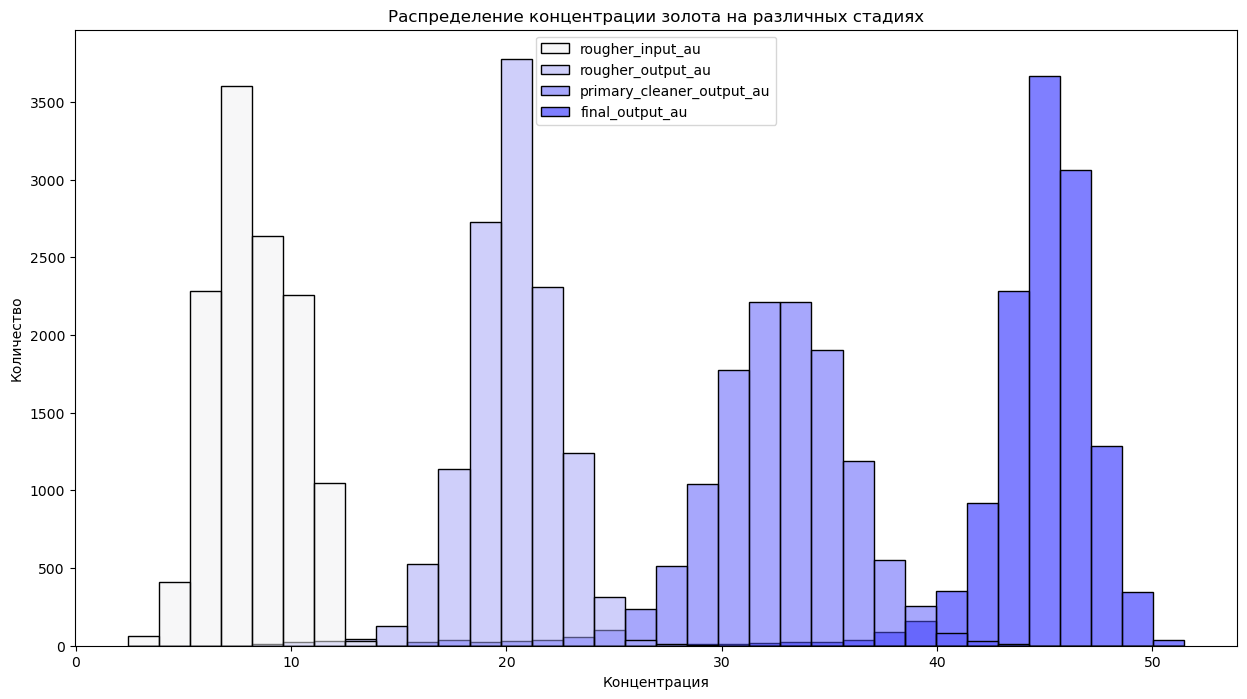

In [80]:
concentration_au = {'rougher_input_au': data_full_clear['rougher.input.feed_au'], 'rougher_output_au': data_full_clear['rougher.output.concentrate_au'],
                   'primary_cleaner_output_au': data_full_clear['primary_cleaner.output.concentrate_au'], 'final_output_au': data_full_clear['final.output.concentrate_au']}
concentration_au = pd.DataFrame(data = concentration_au)

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(concentration_au, palette="light:b")
ax.set_title('Распределение концентрации золота на различных стадиях')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Количество')
None

The concentration of gold increases with each stage.

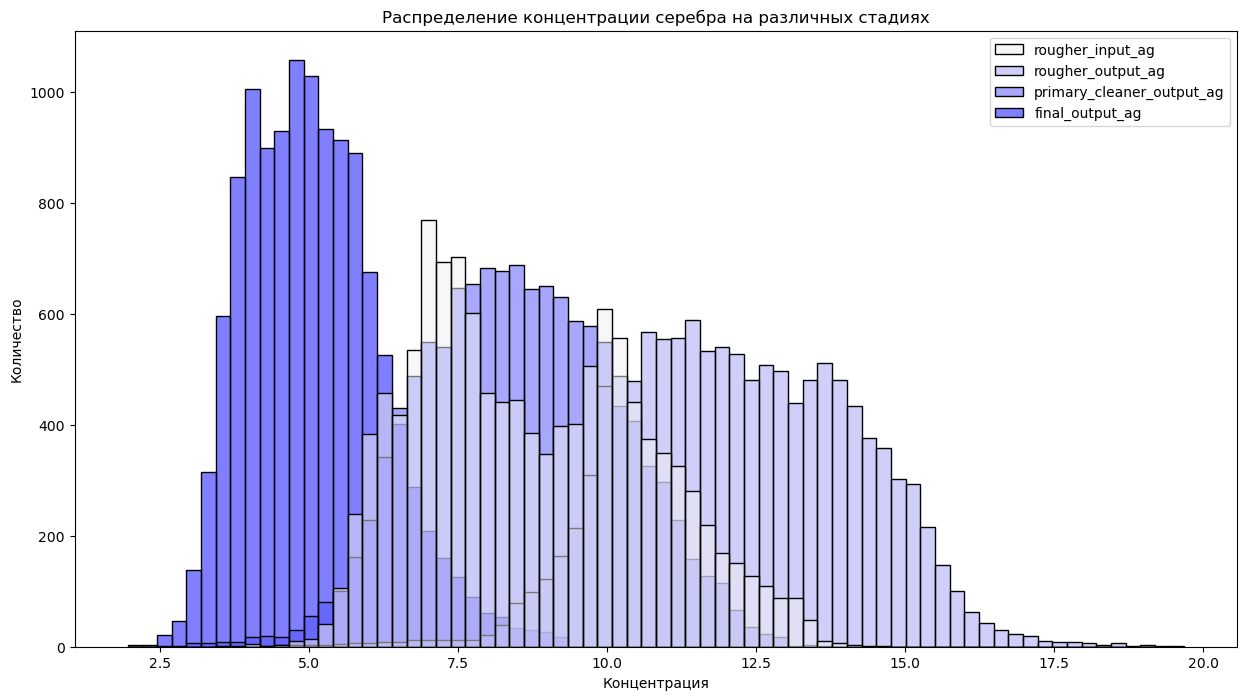

In [81]:
concentration_ag = {'rougher_input_ag': data_full_clear['rougher.input.feed_ag'], 'rougher_output_ag': data_full_clear['rougher.output.concentrate_ag'],
                   'primary_cleaner_output_ag': data_full_clear['primary_cleaner.output.concentrate_ag'], 'final_output_ag': data_full_clear['final.output.concentrate_ag']}
concentration_ag = pd.DataFrame(data = concentration_ag)

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(concentration_ag, palette="light:b")
ax.set_title('Распределение концентрации серебра на различных стадиях')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Количество')
None

The concentration of silver decreases as gold is purified.

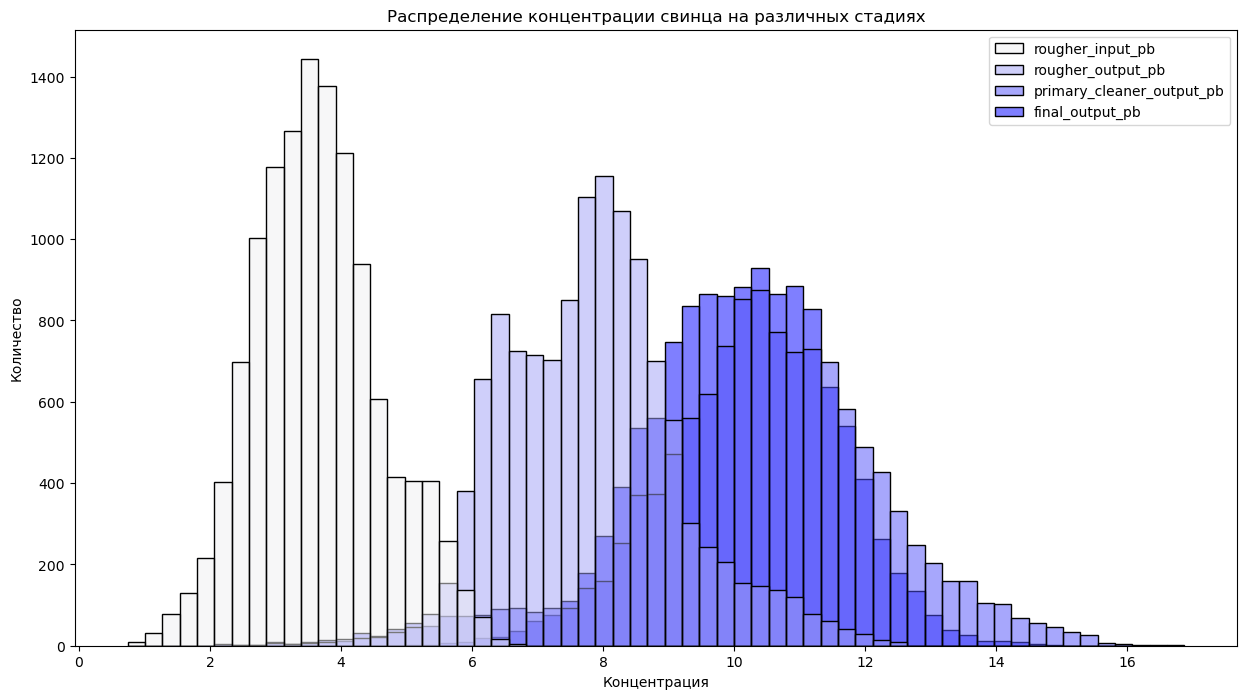

In [82]:
concentration_pb = {'rougher_input_pb': data_full_clear['rougher.input.feed_pb'], 'rougher_output_pb': data_full_clear['rougher.output.concentrate_pb'],
                   'primary_cleaner_output_pb': data_full_clear['primary_cleaner.output.concentrate_pb'], 'final_output_pb': data_full_clear['final.output.concentrate_pb']}
concentration_pb = pd.DataFrame(data = concentration_pb)

f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(concentration_pb, palette="light:b")
ax.set_title('Распределение концентрации свинца на различных стадиях')
ax.set_xlabel('Концентрация')
ax.set_ylabel('Количество')
None

The lead concentration increases until the second purification stage and then remains constant.

Let's compare the distributions of raw material feed particle sizes in the training and test sets.

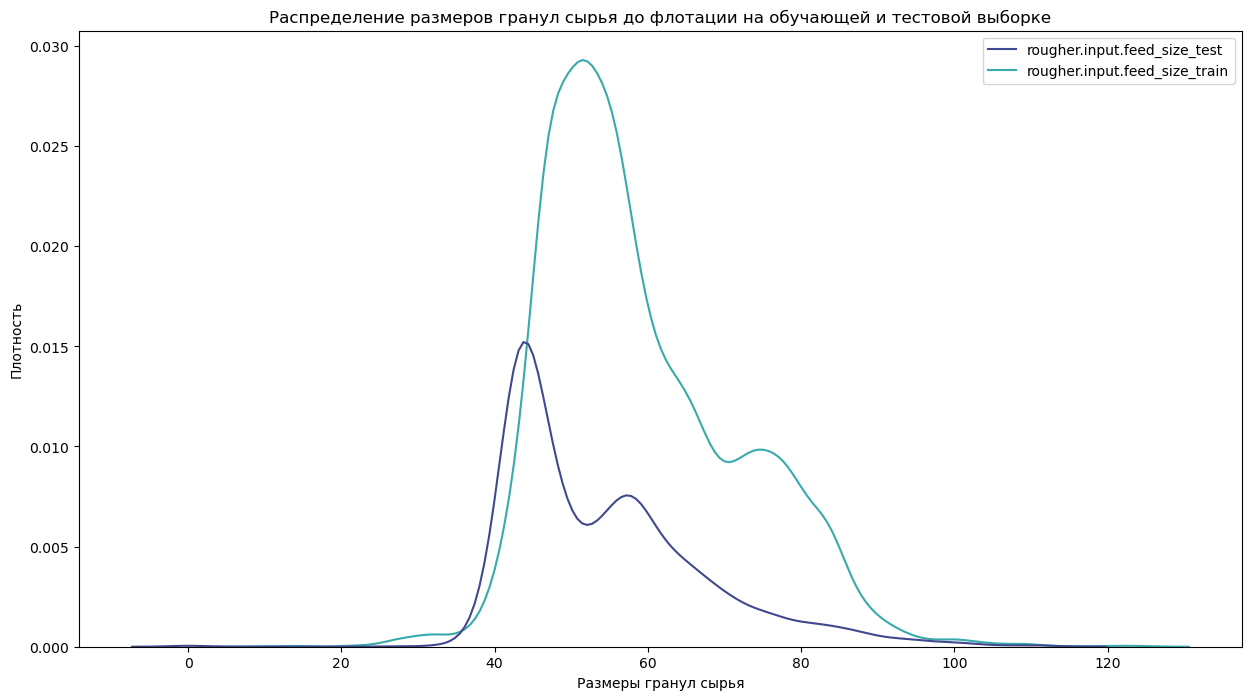

In [83]:
feed_size = {'rougher.input.feed_size_test': data_test_clear['rougher.input.feed_size'],
             'rougher.input.feed_size_train': data_train_clear['rougher.input.feed_size']}
feed_size = pd.DataFrame(feed_size)

f, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(data = feed_size, palette='mako')
ax.set_title('Распределение размеров гранул сырья до флотации на обучающей и тестовой выборке')
ax.set_xlabel('Размеры гранул сырья')
ax.set_ylabel('Плотность')
None

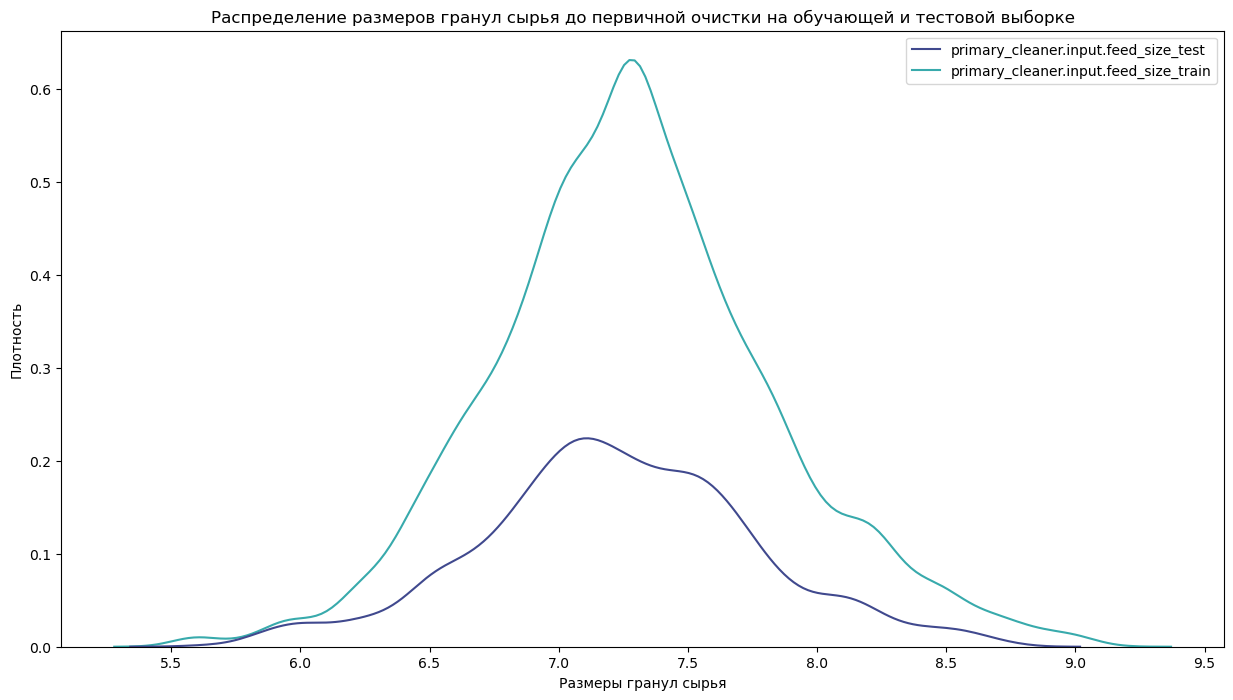

In [84]:
feed_size_primary = {'primary_cleaner.input.feed_size_test': data_test_clear['primary_cleaner.input.feed_size'],
                     'primary_cleaner.input.feed_size_train': data_train_clear['primary_cleaner.input.feed_size']}

feed_size_primary = pd.DataFrame(feed_size_primary)

f, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(data = feed_size_primary, palette='mako')
ax.set_title('Распределение размеров гранул сырья до первичной очистки на обучающей и тестовой выборке')
ax.set_xlabel('Размеры гранул сырья')
ax.set_ylabel('Плотность')
None

In [85]:
feed_size['rougher.input.feed_size_train'].describe()

count    10080.000000
mean        59.070691
std         12.672270
min          9.659576
25%         49.780940
50%         55.824382
75%         66.826762
max        124.582328
Name: rougher.input.feed_size_train, dtype: float64

In [86]:
feed_size['rougher.input.feed_size_test'].describe()

count    3877.000000
mean       54.292729
std        12.822469
min         0.046369
25%        43.812353
50%        50.827499
75%        60.956867
max       112.383021
Name: rougher.input.feed_size_test, dtype: float64

In [87]:
feed_size_primary['primary_cleaner.input.feed_size_test'].describe()

count    3877.000000
mean        7.227040
std         0.536190
min         5.650000
25%         6.900000
50%         7.206667
75%         7.560000
max         8.710000
Name: primary_cleaner.input.feed_size_test, dtype: float64

In [88]:
feed_size_primary['primary_cleaner.input.feed_size_train'].describe()

count    10080.000000
mean         7.290822
std          0.548264
min          5.540000
25%          6.950000
50%          7.280000
75%          7.615417
max          9.110000
Name: primary_cleaner.input.feed_size_train, dtype: float64

The mean values of the distributions are close to each other, as well as the medians. Therefore, we can assume that the distributions are similar.

Let's analyse the total concentration of substances at different stages.

In [89]:
concentration = {'rougher_input': data_full['rougher.input.feed_au'] 
                 + data_full['rougher.input.feed_ag']
                 + data_full['rougher.input.feed_pb']
                 + data_full['rougher.input.feed_sol'],
                 'rougher_output': data_full['rougher.output.concentrate_au'] 
                 + data_full['rougher.output.concentrate_ag']
                 + data_full['rougher.output.concentrate_pb']
                 + data_full['rougher.output.concentrate_sol'],
                 'primary_cleaner_output': data_full['primary_cleaner.output.concentrate_au']
                 + data_full['primary_cleaner.output.concentrate_ag']
                 + data_full['primary_cleaner.output.concentrate_pb']
                 + data_full['primary_cleaner.output.concentrate_sol'],
                 'final_output': data_full['final.output.concentrate_au']
                 + data_full['final.output.concentrate_ag']
                 + data_full['final.output.concentrate_pb']
                 + data_full['final.output.concentrate_sol']}
concentration = pd.DataFrame(data = concentration)
concentration

,rougher_input,rougher_output,primary_cleaner_output,final_output
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
...,...,...,...,...
19434,53.415050,70.781325,59.001692,68.098589
19435,53.696482,70.539603,59.703912,68.274362
19436,54.589604,55.376330,59.561096,68.226068
19437,54.027355,69.201689,57.216686,68.200449


In [90]:
concentration_clear = sigma_outlier(concentration)

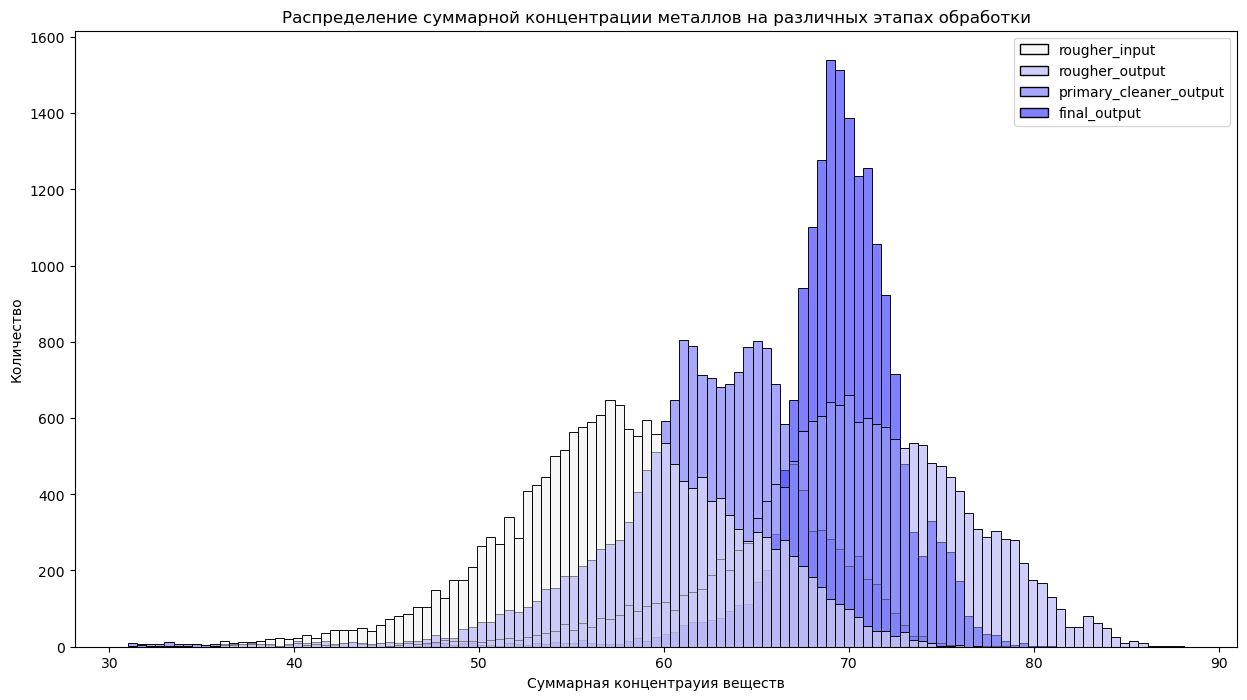

In [91]:
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(concentration_clear, palette="light:b")
ax.set_title('Распределение суммарной концентрации металлов на различных этапах обработки')
ax.set_xlabel('Суммарная концентрауия веществ')
ax.set_ylabel('Количество')
None

The graph shows that the highest concentration is reached at the final stage. This is due to the increase in the concentration of gold by almost 5 times. Graphs of changes in the concentration of substances at different stages of purification were plotted based on the analysis of the data obtained, separately for Au, Ag, and Pb, as well as the total concentration. Also, by examining the particle size distributions of the raw material in the test and training sets, we can conclude that the distributions have a similar nature.

## Model

Let's write a function to calculate the sMAPE metric using the formula provided in the project documentation.

In [100]:
#Функция вычисляющая sMAPE
def sMAPE_score(target, prediction):
    target = target.array
    sMAPE= 1/len(target) * sum(2 * abs(target - prediction) / (abs(target) + abs(prediction)) * 100)
    return sMAPE

In [93]:
def sMAPE_score_total(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

We will split the datasets into features and targets.

In [94]:
#The target is the final and flotation cleaning efficiency.
target_train_rougher = data_train_clear['rougher.output.recovery']
target_train_final = data_train_clear['final.output.recovery']

target_test_rougher = data_test_clear['rougher.output.recovery']
target_test_final = data_test_clear['final.output.recovery']

#Features
features_train = data_train_clear.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
features_test = data_test_clear.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

#Check shape
print(features_train.shape, features_test.shape)

(10080, 52) (3877, 52)


In [95]:
#Стандартизируем признаки
scaler = StandardScaler()

#Обучаем стандартизатор на тренировочной выборке
scaler.fit(features_train)

features_train = scaler.transform(features_train)

#features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

pd.options.mode.chained_assignment = None

features_train = pd.DataFrame(features_train)
#features_valid = pd.DataFrame(features_valid)
features_test = pd.DataFrame(features_test)

We will build various models: linear regression, random forest, and constant. We will use GridSearchCV for cross-validation and parameter tuning.

In [96]:
#Линейная регрессия
regressor = LinearRegression()
param_grid = {}
smape_scorer = make_scorer(sMAPE_score, greater_is_better = False)

model_reg_rougher = GridSearchCV(regressor, param_grid, cv=5, n_jobs = -1,  scoring = smape_scorer)
model_reg_final = GridSearchCV(regressor, param_grid, cv=5, n_jobs = -1,  scoring = smape_scorer)

model_reg_rougher.fit(features_train, target_train_rougher)
model_reg_final.fit(features_train, target_train_final)

best_model_reg_rougher = model_reg_rougher.best_estimator_
best_model_reg_final = model_reg_final.best_estimator_

smape_rougher = model_reg_rougher.best_score_
smape_final = model_reg_final.best_score_

sMAPE = - sMAPE_score_total(smape_rougher, smape_final)
print(sMAPE)

8.72133115676054


In [97]:
%%time

forest = RandomForestRegressor()
param_grid = {'n_estimators': np.arange(100, 1000, 50), 'max_depth': [None] + [i for i in range(2, 11)]}

smape_scorer = make_scorer(sMAPE_score, greater_is_better = False)

model_forest_rougher = RandomizedSearchCV(forest, param_distributions = param_grid, cv=5, n_iter=50, n_jobs = -1, verbose=10, scoring = smape_scorer)
model_forest_final = RandomizedSearchCV(forest, param_distributions = param_grid, cv=5, n_iter=50, n_jobs = -1, verbose=10, scoring = smape_scorer)

model_forest_rougher.fit(features_train, target_train_rougher)
model_forest_final.fit(features_train, target_train_final)

best_model_forest_rougher = model_forest_rougher.best_estimator_
best_model_forest_final = model_forest_final.best_estimator_

smape_rougher = model_forest_rougher.best_score_
smape_final = model_forest_final.best_score_

sMAPE_forest = - sMAPE_score_total(smape_rougher, smape_final)
print(sMAPE_forest)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
7.99035964640926
Wall time: 1h 25s


In [101]:
#Константная модель
dummy_regr_rougher = DummyRegressor(strategy="mean")
dummy_regr_final = DummyRegressor(strategy="mean")

dummy_regr_rougher.fit(features_train, target_train_rougher)
dummy_regr_final.fit(features_train, target_train_final)

predicted_dummy_rougher = dummy_regr_rougher.predict(features_test)
predicted_dummy_final = dummy_regr_final.predict(features_test)

sMAPE_dummy_rougher = sMAPE_score(predicted_dummy_rougher, target_test_rougher)
sMAPE_dummy_final = sMAPE_score(predicted_dummy_final, target_test_final)

sMAPE_dummy_total = sMAPE_score_total(sMAPE_dummy_rougher, sMAPE_dummy_final)
sMAPE_dummy_total

6.397976978536371

Linear regression and random forest results are slightly better than dummy. Let's look at the distributions of prediction and true answers.

The best model is RandomForest. sMAPE for Forest is 8 versus 8.7 for linear regression.

In [102]:
predict_rougher_test = best_model_forest_rougher.predict(features_test)
predict_final_test = best_model_forest_final.predict(features_test)

sMAPE_test_rougher = sMAPE_score(predict_rougher_test, target_test_rougher)
sMAPE_test_final = sMAPE_score(predict_final_test, target_test_final)

sMAPE_total_test = sMAPE_score_total(sMAPE_test_rougher, sMAPE_test_final)
sMAPE_total_test

6.2765095748305955

**Сonclusions:**
* The provided data was studied and processed.
* The calculated value of the recovery efficiency matches that presented in the data.
* Missing data was filled with the median.
* Outliers were removed beyond three standard deviations.
* An analysis of the obtained data was conducted.
* The shown graphs illustrate how the concentration of various substances changes during the processing.
* Various models were built and for each of them, the sMAPE metric was found.
* The linear regression model is considered to be the best.